## create  specific color
#颜色参考
#https://matplotlib.org/3.5.0/gallery/color/colormap_reference.html
# cmap = mpl.cm.PuBu_r
#后面加_r就是颜色reverse的意思

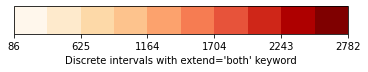

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
fig, ax = plt.subplots(figsize=(6, 1))
# cax1 = fig.add_axes([0.27, 0.8, 0.5, 0.05])
# cax2 = fig.add_axes([0.27, 0.4, 0.5, 0.05])
fig.subplots_adjust(bottom=0.5)
fig.subplots_adjust(bottom=0.5)
# cmap = mpl.cm.PuBu_r
#后面加_r就是颜色reverse的意思
# cmap = mpl.cm.PuBu
#颜色参考
#https://matplotlib.org/3.5.0/gallery/color/colormap_reference.html
cmap = mpl.cm.OrRd
# my_cmap_r = reverse_colourmap(cmap)
# cmap = mpl.cm.viridis
bounds= np.linspace(86,2782,11)
# bounds = [-1, 2, 5, 7, 12, 15]
norm = mpl.colors.BoundaryNorm(bounds,
                               cmap.N,
#                                extend='both'
                              )

cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")

plt.show()

## get color RGBA  from colorbar
## reference
# https://stackoverflow.com/questions/25408393/getting-individual-colors-from-a-color-map-in-matplotlib

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
# https://stackoverflow.com/questions/25408393/getting-individual-colors-from-a-color-map-in-matplotlib
# 参考帖子
class MplColorHelper:

  def __init__(self, cmap_name, start_val, stop_val):
    self.cmap_name = cmap_name
    self.cmap = plt.get_cmap(cmap_name)
    self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val)
    self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

  def get_rgb(self, val):
    return self.scalarMap.to_rgba(val)

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
# https://stackoverflow.com/questions/25408393/getting-individual-colors-from-a-color-map-in-matplotlib
# 参考帖子
class MplColorHelper:

  def __init__(self, cmap_name):
    #OrRd
    self.cmap_name = cmap_name
    self.cmap = plt.get_cmap(cmap_name)
    self.bounds=np.linspace(86,2782,11)
    self.norm = mpl.colors.BoundaryNorm(self.bounds,
                               cmap.N,
#                                extend='both'
                              )
    self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

  def get_rgb(self, val):
    return self.scalarMap.to_rgba(val)

In [14]:
COLOR = MplColorHelper('OrRd')
rgb=COLOR.get_rgb(86)
rgb

(1.0, 0.9686274509803922, 0.9254901960784314, 1.0)

In [54]:
def NSE_box_plot(nse_dataframe):
    # load nse series of 18 regions
    cal_nse_series = [[]] * 18
    val_nse_series = [[]] * 18
    region_mean_elevation=[[]] * 18

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))

    for region in range(1,18+1):
        count=region-1
        # NSE_cal_series=nse_dataframe[nse_dataframe['Region']==region]['calibrate_nse']
        # cal_nse_series[count]=NSE_cal_series.values[~np.isnan(NSE_cal_series.values)]
        #
        # NSE_val_series = nse_dataframe[nse_dataframe['Region'] == region]['validate_nse']
        # val_nse_series[count] = NSE_val_series.values[~np.isnan(NSE_val_series.values)]
        NSE_cal_series = nse_dataframe[nse_dataframe['Region'] == region]['calibrate_nse'].dropna()
        cal_nse_series[count] = NSE_cal_series.values
        NSE_val_series = nse_dataframe[nse_dataframe['Region'] == region]['validate_nse'].dropna()
        val_nse_series[count] = NSE_val_series.values
    labels = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12','13', '14', '15','16', '17', '18']

    bp = ax1.boxplot(cal_nse_series, patch_artist=True, showfliers=False)
    ax1.set_xticks(range(1, 19))
    ax2.set_xticklabels(labels)
    cs = ['#9BC4E1', 'k']
    for box in bp['boxes']:
        #get the region mean eleva
        
        box.set(color='b', alpha=1)
        box.set(facecolor=cs[0], alpha=1)
    for whisker in bp['whiskers']:
        whisker.set(color=cs[1], linewidth=1, linestyle='-')
    for cap in bp['caps']:
        cap.set(color=cs[1], linewidth=1)
    for median in bp['medians']:
        median.set(color=cs[1], linewidth=1.5)
    # ax1.set_xlabel('region')
    ax1.set_title('calibration period nse')
    ax1.set_ylabel(r'NSE')
    plt.grid()
    for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] + ax1.get_xticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(15)

    bp2 = ax2.boxplot(cal_nse_series, patch_artist=True, showfliers=False)
    ax1.set_xticks(range(1, 19))
    ax1.grid()
    ax2.set_xticklabels(labels)
    cs = ['#9BC4E1', 'k']
    for box in bp2['boxes']:
        box.set(color='b', alpha=1)
        box.set(facecolor=cs[0], alpha=1)
#         box.set(facecolor=(0.9921568627450981, 0.7660130718954248, 0.5516339869281046, 1.0), alpha=1)

    for whisker in bp2['whiskers']:
        whisker.set(color=cs[1], linewidth=1, linestyle='-')
    for cap in bp2['caps']:
        cap.set(color=cs[1], linewidth=1)
    for median in bp2['medians']:
        median.set(color=cs[1], linewidth=1.5)
    plt.xlabel('region')
    ax2.set_title('validation period nse')
    plt.ylabel(r'NSE')
    plt.grid()
    for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] + ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(15)
    ax2.grid()

<ipython-input-11-e14bce219ad3>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels)


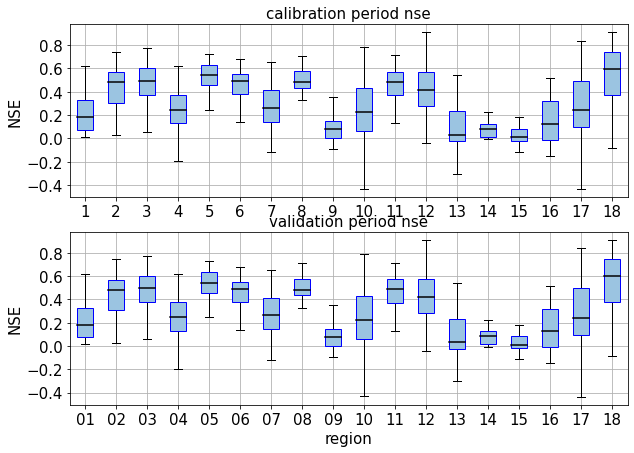

In [13]:
import numpy as np
import  pandas as pd
file=r'C:\Users\dingxj\Desktop\HCDN\result11.csv'
nse_dataframe=pd.read_csv(file)
NSE_box_plot(nse_dataframe)
plt.show()

<ipython-input-56-874c3fca850c>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels)


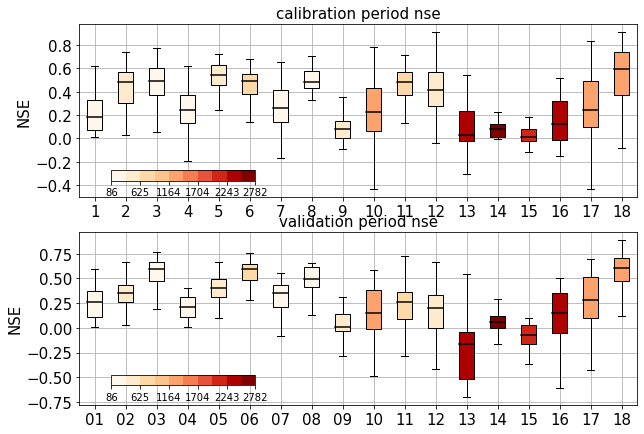

In [56]:

def NSE_box_plot(nse_dataframe):
    # load nse series of 18 regions
    cal_nse_series = [[]] * 18
    val_nse_series = [[]] * 18
    region_mean_elevation=[[]] * 18

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
    
    #自定义 color bar
    #cax 为子图的绘图范围[xmin,ymin,width,height]

    cax1 = fig.add_axes([0.17, 0.57, 0.2, 0.02])
    cax2 = fig.add_axes([0.17, 0.165, 0.2, 0.02])
    cmap = mpl.cm.OrRd
    bounds= np.linspace(86,2782,11)
    norm = mpl.colors.BoundaryNorm(bounds,
                               cmap.N,
#                                extend='both'
                              )
    class MplColorHelper:
        def __init__(self, cmap_name):
            #OrRd
            self.cmap_name = cmap_name
            self.cmap = plt.get_cmap(cmap_name)
            self.bounds=np.linspace(86,2782,11)
            self.norm = mpl.colors.BoundaryNorm(self.bounds,
                                       cmap.N,)

            self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)
        def get_rgb(self, val):
            return self.scalarMap.to_rgba(val)
    COLOR = MplColorHelper('OrRd')
    for region in range(1,18+1):
        count=region-1
        # NSE_cal_series=nse_dataframe[nse_dataframe['Region']==region]['calibrate_nse']
        # cal_nse_series[count]=NSE_cal_series.values[~np.isnan(NSE_cal_series.values)]
        #
        # NSE_val_series = nse_dataframe[nse_dataframe['Region'] == region]['validate_nse']
        # val_nse_series[count] = NSE_val_series.values[~np.isnan(NSE_val_series.values)]
        eleva_series=nse_dataframe[nse_dataframe['Region'] == region]['Eleva'].dropna()
        region_mean_elevation[count]=eleva_series.values
        NSE_cal_series = nse_dataframe[nse_dataframe['Region'] == region]['calibrate_nse'].dropna()
        cal_nse_series[count] = NSE_cal_series.values
        NSE_val_series = nse_dataframe[nse_dataframe['Region'] == region]['validate_nse'].dropna()
        val_nse_series[count] = NSE_val_series.values
    labels = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12','13', '14', '15','16', '17', '18']

    bp = ax1.boxplot(cal_nse_series, patch_artist=True, showfliers=False)
    ax1.set_xticks(range(1, 19))
    ax2.set_xticklabels(labels)
    cs = ['#9BC4E1', 'k']
   
    for i,box in enumerate(bp['boxes']):
        #get the mean eleva
        mean_eleva=region_mean_elevation[i].mean()
        rgb=COLOR.get_rgb(mean_eleva)
        box.set(color='k', alpha=1)
        box.set(facecolor=rgb, alpha=1)
    for whisker in bp['whiskers']:
        whisker.set(color=cs[1], linewidth=1, linestyle='-')
    for cap in bp['caps']:
        cap.set(color=cs[1], linewidth=1)
    for median in bp['medians']:
        median.set(color=cs[1], linewidth=1.5)
    # ax1.set_xlabel('region')
    ax1.set_title('calibration period nse')
    ax1.set_ylabel(r'NSE')
    plt.grid()
    for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] + ax1.get_xticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(15)

    bp2 = ax2.boxplot(val_nse_series, patch_artist=True, showfliers=False)
    ax1.set_xticks(range(1, 19))
    
    ax1.grid()
    ax2.set_xticklabels(labels)
    cs = ['#9BC4E1', 'k']
    for i,box in enumerate(bp2['boxes']):
        #get the mean eleva
        mean_eleva=region_mean_elevation[i].mean()
        rgb=COLOR.get_rgb(mean_eleva)
        box.set(color='k', alpha=1)
        box.set(facecolor=rgb, alpha=1)
    for whisker in bp2['whiskers']:
        whisker.set(color=cs[1], linewidth=1, linestyle='-')
    for cap in bp2['caps']:
        cap.set(color=cs[1], linewidth=1)
    for median in bp2['medians']:
        median.set(color=cs[1], linewidth=1.5)
    plt.xlabel('region')
    ax2.set_title('validation period nse')
    ax2.set_ylabel(r'NSE')
#     plt.ylabel(r'NSE')
    plt.grid()
    #将colorbar 绘制到boxplot中

    for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] + ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(15)
    ax2.grid()
#     plt.ylabel(r'NSE')
    cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=cax1, orientation='horizontal',
#              label="Discrete intervals with extend='both' keyword"
                     )
    cbar2=fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=cax2, orientation='horizontal',
#              label="Discrete intervals with extend='both' keyword"
                      )
import numpy as np
import  pandas as pd
file=r'C:\Users\dingxj\Desktop\HCDN\result11.csv'
nse_dataframe=pd.read_csv(file)
NSE_box_plot(nse_dataframe)
plt.show()

<ipython-input-36-5c07ce13b503>:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels)


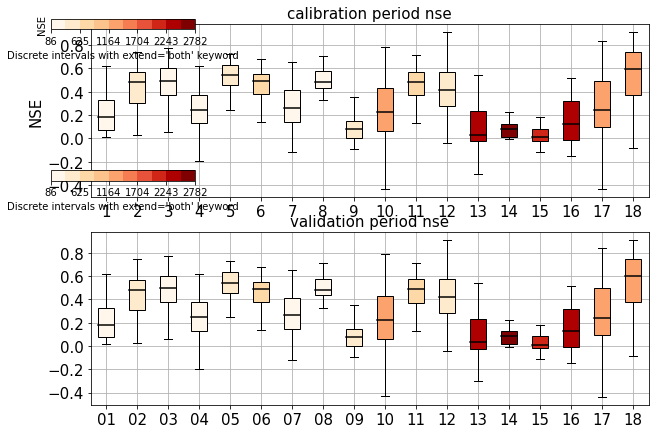

boxplot plot with colorbar